# Build a regression model: logistic regression
<br>


## Build a logistic regression model - Lesson 4

<p >
   <img src="../../images/logistic-linear.png"
   width="600"/>
   <figcaption>Infographic by Dasani Madipalli</figcaption>

<!--![Infographic by Dasani Madipalli](../../images/logistic-linear.png){width="600"}-->

#### ** [Pre-lecture quiz](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/15/)**

####  Introduction

In this final lesson on Regression, one of the basic *classic* ML techniques, we will take a look at Logistic Regression. You would use this technique to discover patterns to predict `binary` `categories`. Is this candy chocolate or not? Is this disease contagious or not? Will this customer choose this product or not?

In this lesson, you will learn:

-   Techniques for logistic regression

✅ Deepen your understanding of working with this type of regression in this [Learn module](https://docs.microsoft.com/learn/modules/train-evaluate-classification-models?WT.mc_id=academic-77952-leestott)

#### **Prerequisite**

Having worked with the pumpkin data, we are now familiar enough with it to realize that there's one binary category that we can work with: `Color`.

Let's build a logistic regression model to predict that, given some variables, *what color a given pumpkin is likely to be* (orange 🎃 or white 👻).

> Why are we talking about binary classification in a lesson grouping about regression? Only for linguistic convenience, as logistic regression is [really a classification method](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), albeit a linear-based one. Learn about other ways to classify data in the next lesson group.

For this lesson, we'll require the following packages:

-   `tidyverse`: The [tidyverse](https://www.tidyverse.org/) is a [collection of R packages](https://www.tidyverse.org/packages) designed to makes data science faster, easier and more fun!

-   `tidymodels`: The [tidymodels](https://www.tidymodels.org/) framework is a [collection of packages](https://www.tidymodels.org/packages/) for modeling and machine learning.

-   `janitor`: The [janitor package](https://github.com/sfirke/janitor) provides simple little tools for examining and cleaning dirty data.

-   `ggbeeswarm`: The [ggbeeswarm package](https://github.com/eclarke/ggbeeswarm) provides methods to create beeswarm-style plots using ggplot2.

You can have them installed as:

`install.packages(c("tidyverse", "tidymodels", "janitor", "ggbeeswarm"))`

Alternately, the script below checks whether you have the packages required to complete this module and installs them for you in case they are missing.

In [1]:
suppressWarnings(if (!require("pacman")) install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, janitor, ggbeeswarm)

Loading required package: pacman

Installing package into ‘/home/lukmanaliyu/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’



ggbeeswarm installed



## ** Define the question**

For our purposes, we will express this as a binary: 'Orange' or 'Not Orange'. There is also a 'striped' category in our dataset but there are few instances of it, so we will not use it. It disappears once we remove null values from the dataset, anyway.

> 🎃 Fun fact, we sometimes call white pumpkins 'ghost' pumpkins. They aren't very easy to carve, so they aren't as popular as the orange ones but they are cool looking!

## **About logistic regression**

Logistic regression differs from linear regression, which you learned about previously, in a few important ways.

#### **Binary classification**

Logistic regression does not offer the same features as linear regression. The former offers a prediction about a `binary category` ("orange or not orange") whereas the latter is capable of predicting `continual values`, for example given the origin of a pumpkin and the time of harvest, *how much its price will rise*.

<p >
   <img src="../../images/pumpkin-classifier.png"
   width="600"/>
   <figcaption>Infographic by Dasani Madipalli</figcaption>

<!--![Infographic by Dasani Madipalli](../../images/pumpkin-classifier.png){width="600"}-->

#### **Other classifications**

There are other types of logistic regression, including multinomial and ordinal:

-   **Multinomial**, which involves having more than one category - "Orange, White, and Striped".

-   **Ordinal**, which involves ordered categories, useful if we wanted to order our outcomes logically, like our pumpkins that are ordered by a finite number of sizes (mini,sm,med,lg,xl,xxl).

<p >
   <img src="../../images/multinomial-ordinal.png"
   width="700"/>
   <figcaption>Infographic by Dasani Madipalli</figcaption>

<!--![Infographic by Dasani Madipalli](../../images/multinomial-ordinal.png){width="600"}-->

**It's still linear**

Even though this type of Regression is all about 'category predictions', it still works best when there is a clear linear relationship between the dependent variable (color) and the other independent variables (the rest of the dataset, like city name and size). It's good to get an idea of whether there is any linearity dividing these variables or not.

#### **Variables DO NOT have to correlate**

Remember how linear regression worked better with more correlated variables? Logistic regression is the opposite - the variables don't have to align. That works for this data which has somewhat weak correlations.

#### **You need a lot of clean data**

Logistic regression will give more accurate results if you use more data; our small dataset is not optimal for this task, so keep that in mind.

✅ Think about the types of data that would lend themselves well to logistic regression


## 1. Tidy the data

Now, the fun begins! Let's start by importing the data, cleaning the data a bit, dropping rows containing missing values and selecting only some of the columns:

In [2]:
# Load the core tidyverse packages
library(tidyverse)

# Import the data and clean column names
pumpkins <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv") %>% 
  clean_names()

# Select desired columns
pumpkins_select <- pumpkins %>% 
  select(c(city_name, package, variety, origin, item_size, color)) 

# Drop rows containing missing values and encode color as factor (category)
pumpkins_select <- pumpkins_select %>% 
  drop_na() %>% 
  mutate(color = factor(color))

# View the first few rows
pumpkins_select %>% 
  slice_head(n = 5)


New names:
• `` -> `...25`
• `` -> `...26`
Rows: 1757 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): City Name, Type, Package, Variety, Sub Variety, Date, Origin, Orig...
dbl  (4): Low Price, High Price, Mostly Low, Mostly High
lgl  (9): Grade, Environment, Quality, Condition, Appearance, Storage, Crop,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


city_name,package,variety,origin,item_size,color
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


Sometimes, we may want some little more information on our data. We can have a look at the `data`, `its structure` and the `data type` of its features by using the [*glimpse()*](https://pillar.r-lib.org/reference/glimpse.html) function as below:

In [3]:
pumpkins_select %>% 
  glimpse()

Rows: 991
Columns: 6
$ city_name <chr> "BALTIMORE", "BALTIMORE", "BALTIMORE", "BALTIMORE", "BALTIMO…
$ package   <chr> "24 inch bins", "24 inch bins", "24 inch bins", "24 inch bin…
$ variety   <chr> "HOWDEN TYPE", "HOWDEN TYPE", "HOWDEN TYPE", "HOWDEN TYPE", …
$ origin    <chr> "DELAWARE", "VIRGINIA", "MARYLAND", "MARYLAND", "MARYLAND", …
$ item_size <chr> "med", "med", "lge", "lge", "med", "lge", "med", "lge", "med…
$ color     <fct> ORANGE, ORANGE, ORANGE, ORANGE, ORANGE, ORANGE, ORANGE, ORAN…


Wow! Seems that all our columns are all of type *character*, further alluding that they are all categorical.

Let's confirm that we will actually be doing a binary classification problem:

In [4]:
# Subset distinct observations in outcome column
pumpkins_select %>% 
  distinct(color)

color
<fct>
ORANGE
WHITE


🥳🥳 That went down well!

## 2. Explore the data

The goal of data exploration is to try to understand the `relationships` between its attributes; in particular, any apparent correlation between the *features* and the *label* your model will try to predict. One way of doing this is by using data visualization.

Given our the data types of our columns, we can `encode` them and be on our way to making some visualizations. This simply involves `translating` a column with `categorical values` for example our columns of type *char*, into one or more `numeric columns` that take the place of the original. - Something we did in our [last lesson](https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/3-Linear/solution/lesson_3-R.ipynb).

Tidymodels provides yet another neat package: [recipes](https://recipes.tidymodels.org/)- a package for preprocessing data. We'll define a `recipe` that specifies that all predictor columns should be encoded into a set of integers , `prep` it to estimates the required quantities and statistics needed by any operations and finally `bake` to apply the computations to new data.

> Normally, recipes is usually used as a preprocessor for modelling where it defines what steps should be applied to a data set in order to get it ready for modelling. In that case it is **highly recommend** that you use a `workflow()` instead of manually estimating a recipe using prep and bake. We'll see all this in just a moment.
>
> However for now, we are using recipes + prep + bake to specify what steps should be applied to a data set in order to get it ready for data analysis and then extract the preprocessed data with the steps applied.

In [5]:
# Preprocess and extract data to allow some data analysis
baked_pumpkins <- recipe(color ~ ., data = pumpkins_select) %>% 
  # Encode all columns to a set of integers
  step_integer(all_predictors(), zero_based = T) %>% 
  prep() %>% 
  bake(new_data = NULL)


# Display the first few rows of preprocessed data
baked_pumpkins %>% 
  slice_head(n = 5)

city_name,package,variety,origin,item_size,color
<int>,<int>,<int>,<int>,<int>,<fct>
1,3,4,3,3,ORANGE
1,3,4,17,3,ORANGE
1,3,4,5,2,ORANGE
1,3,4,5,2,ORANGE
1,4,4,5,3,ORANGE


Now let's compare the feature distributions for each label value using box plots. We'll begin by formatting the data to a *long* format to make it somewhat easier to make multiple `facets`.

In [6]:
# Pivot data to long format
baked_pumpkins_long <- baked_pumpkins %>% 
  pivot_longer(!color, names_to = "features", values_to = "values")


# Print out restructured data
baked_pumpkins_long %>% 
  slice_head(n = 10)


color,features,values
<fct>,<chr>,<int>
ORANGE,city_name,1
ORANGE,package,3
ORANGE,variety,4
ORANGE,origin,3
ORANGE,item_size,3
ORANGE,city_name,1
ORANGE,package,3
ORANGE,variety,4
ORANGE,origin,17


Now, let's make some boxplots showing the distribution of the predictors with respect to the outcome color.

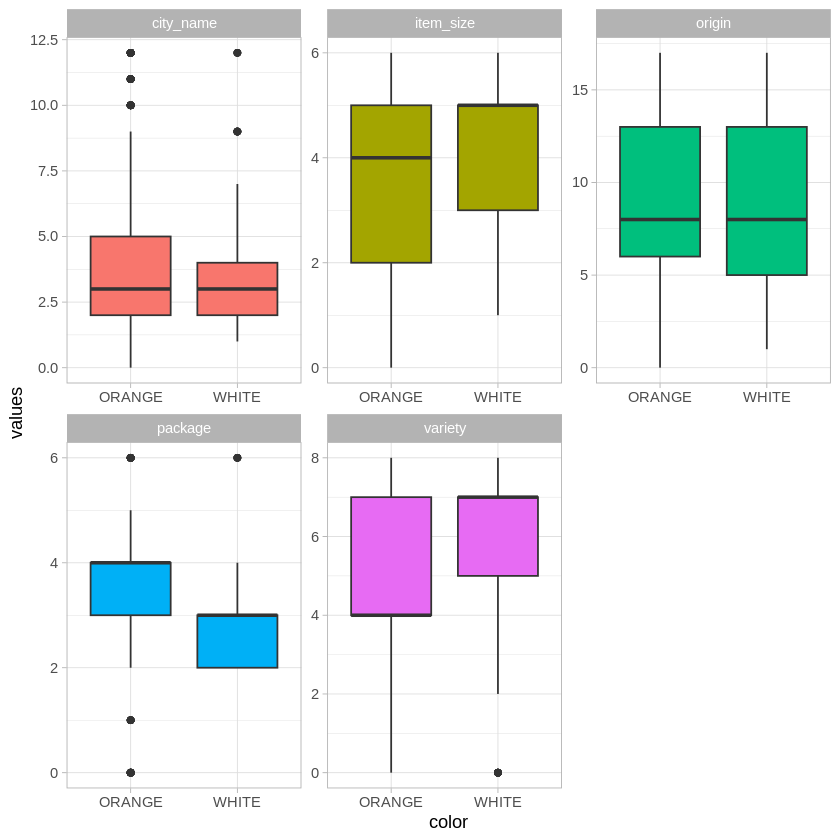

In [7]:
theme_set(theme_light())
#Make a box plot for each predictor feature
baked_pumpkins_long %>% 
  mutate(color = factor(color)) %>% 
  ggplot(mapping = aes(x = color, y = values, fill = features)) +
  geom_boxplot() + 
  facet_wrap(~ features, scales = "free", ncol = 3) +
  scale_color_viridis_d(option = "cividis", end = .8) +
  theme(legend.position = "none")

Amazing🤩! For some of the features, there's a noticeable difference in the distribution for each color label. For instance, it seems the white pumpkins can be found in smaller packages and in some particular varieties of pumpkins. The *item_size* category also seems to make a difference in the color distribution. These features may help predict the color of a pumpkin.

#### **Use a swarm plot**

Color is a binary category (Orange or Not), it's called `categorical data`. There are other various ways of [visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html?highlight=bar).

Try a `swarm plot` to show the distribution of color with respect to the item_size.

We'll use the [ggbeeswarm package](https://github.com/eclarke/ggbeeswarm) which provides methods to create beeswarm-style plots using ggplot2. Beeswarm plots are a way of plotting points that would ordinarily overlap so that they fall next to each other instead.

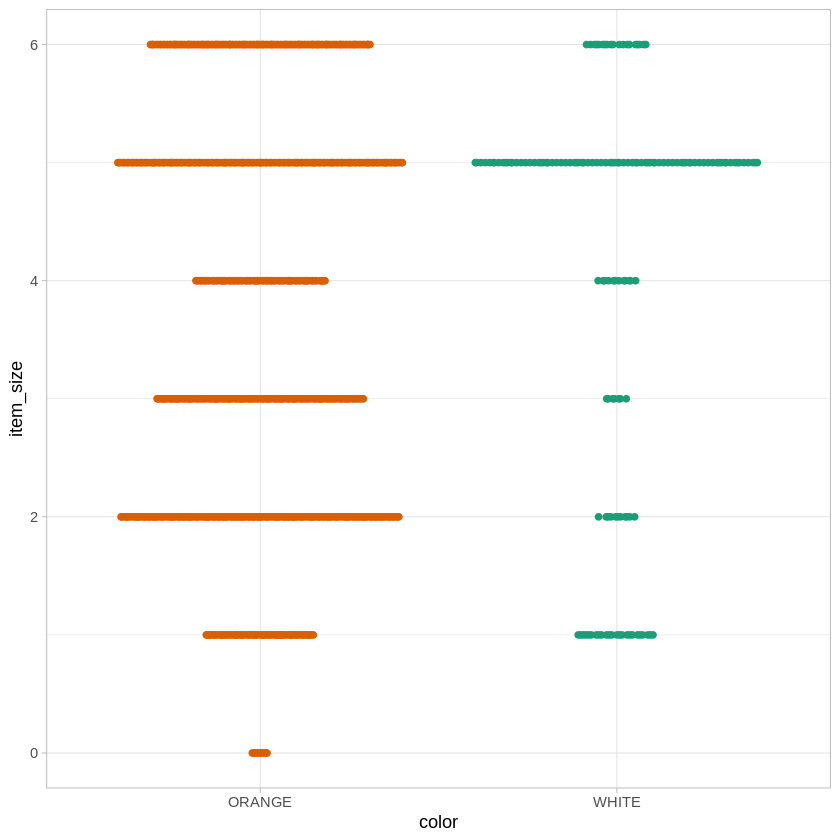

In [8]:
# Create beeswarm plots of color and item_size
baked_pumpkins %>% 
  mutate(color = factor(color)) %>% 
  ggplot(mapping = aes(x = color, y = item_size, color = color)) +
  geom_quasirandom() +
  scale_color_brewer(palette = "Dark2", direction = -1) +
  theme(legend.position = "none")

#### **Violin plot**

A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. [`Violin plots`](https://en.wikipedia.org/wiki/Violin_plot) are similar to box plots, except that they also show the probability density of the data at different values. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.

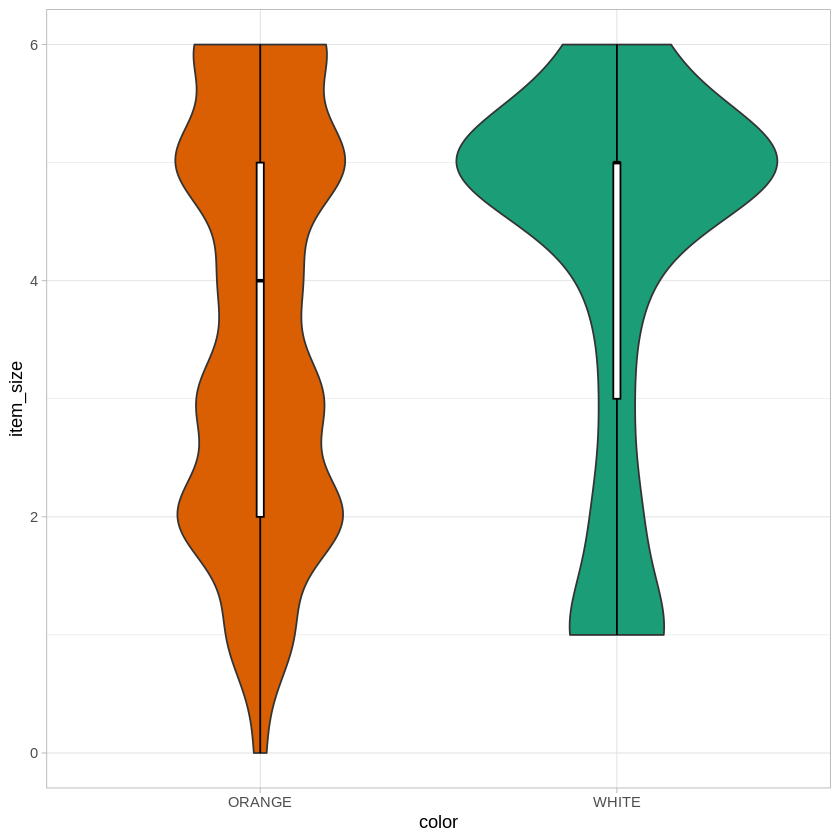

In [9]:
# Create a violin plot of color and item_size
baked_pumpkins %>%
  mutate(color = factor(color)) %>% 
  ggplot(mapping = aes(x = color, y = item_size, fill = color)) +
  geom_violin() +
  geom_boxplot(color = "black", fill = "white", width = 0.02) +
  scale_fill_brewer(palette = "Dark2", direction = -1) +
  theme(legend.position = "none")

Now that we have an idea of the relationship between the binary categories of color and the larger group of sizes, let's explore logistic regression to determine a given pumpkin's likely color.

## 3. Build your logistic regression model

<p >
   <img src="../../images/logistic-linear.png"
   width="600"/>
   <figcaption>Infographic by Dasani Madipalli</figcaption>

> **🧮 Show Me The Math**
>
> Remember how `linear regression` often used `ordinary least squares` to arrive at a value? `Logistic regression` relies on the concept of 'maximum likelihood' using [`sigmoid functions`](https://wikipedia.org/wiki/Sigmoid_function). A Sigmoid Function on a plot looks like an `S shape`. It takes a value and maps it to somewhere between 0 and 1. Its curve is also called a 'logistic curve'. Its formula looks like this:
>
> 
<p >
   <img src="../../images/sigmoid.png">


> where the sigmoid's midpoint finds itself at x's 0 point, L is the curve's maximum value, and k is the curve's steepness. If the outcome of the function is more than 0.5, the label in question will be given the class 1 of the binary choice. If not, it will be classified as 0.

Let's begin by splitting the data into `training` and `test` sets. The training set is used to train a classifier so that it finds a statistical relationship between the features and the label value.

It is best practice to hold out some of your data for **testing** in order to get a better estimate of how your models will perform on new data by comparing the predicted labels with the already known labels in the test set. [rsample](https://rsample.tidymodels.org/), a package in Tidymodels, provides infrastructure for efficient data splitting and resampling:

In [ ]:
# Split data into 80% for training and 20% for testing
set.seed(2056)
pumpkins_split <- pumpkins_select %>% 
  initial_split(prop = 0.8)

# Extract the data in each split
pumpkins_train <- training(pumpkins_split)
pumpkins_test <- testing(pumpkins_split)

# Print out the first 5 rows of the training set
pumpkins_train %>% 
  slice_head(n = 5)

🙌 We are now ready to train a model by fitting the training features to the training label (color).

We'll begin by creating a recipe that specifies the preprocessing steps that should be carried out on our data to get it ready for modelling i.e: encoding categorical variables into a set of integers.

There are quite a number of ways to specify a logistic regression model in Tidymodels. See `?logistic_reg()` For now, we'll specify a logistic regression model via the default `stats::glm()` engine.

In [ ]:
# Create a recipe that specifies preprocessing steps for modelling
pumpkins_recipe <- recipe(color ~ ., data = pumpkins_train) %>% 
  step_integer(all_predictors(), zero_based = TRUE)


# Create a logistic model specification
log_reg <- logistic_reg() %>% 
  set_engine("glm") %>% 
  set_mode("classification")


Now that we have a recipe and a model specification, we need to find a way of bundling them together into an object that will first preprocess the data (prep+bake behind the scenes), fit the model on the preprocessed data and also allow for potential post-processing activities.

In Tidymodels, this convenient object is called a [`workflow`](https://workflows.tidymodels.org/) and conveniently holds your modeling components.

In [ ]:
# Bundle modelling components in a workflow
log_reg_wf <- workflow() %>% 
  add_recipe(pumpkins_recipe) %>% 
  add_model(log_reg)

# Print out the workflow
log_reg_wf


After a workflow has been *specified*, a model can be `trained` using the [`fit()`](https://tidymodels.github.io/parsnip/reference/fit.html) function. The workflow will estimate a recipe and preprocess the data before training, so we won't have to manually do that using prep and bake.

In [ ]:
# Train the model
wf_fit <- log_reg_wf %>% 
  fit(data = pumpkins_train)

# Print the trained workflow
wf_fit

The model print out shows the coefficients learned during training.

Now we've trained the model using the training data, we can make predictions on the test data using [parsnip::predict()](https://parsnip.tidymodels.org/reference/predict.model_fit.html). Let's start by using the model to predict labels for our test set and the probabilities for each label. When the probability is more than 0.5, the predict class is `ORANGE` else `WHITE`.

In [ ]:
# Make predictions for color and corresponding probabilities
results <- pumpkins_test %>% select(color) %>% 
  bind_cols(wf_fit %>% 
              predict(new_data = pumpkins_test)) %>%
  bind_cols(wf_fit %>%
              predict(new_data = pumpkins_test, type = "prob"))

# Compare predictions
results %>% 
  slice_head(n = 10)

Very nice! This provides some more insights into how logistic regression works.

Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Fortunately, Tidymodels has a few more tricks up its sleeve: [`yardstick`](https://yardstick.tidymodels.org/) - a package used to measure the effectiveness of models using performance metrics.

One performance metric associated with classification problems is the [`confusion matrix`](https://wikipedia.org/wiki/Confusion_matrix). A confusion matrix describes how well a classification model performs. A confusion matrix tabulates how many examples in each class were correctly classified by a model. In our case, it will show you how many orange pumpkins were classified as orange and how many white pumpkins were classified as white; the confusion matrix also shows you how many were classified into the **wrong** categories.

The [**`conf_mat()`**](https://tidymodels.github.io/yardstick/reference/conf_mat.html) function from yardstick calculates this cross-tabulation of observed and predicted classes.

In [ ]:
# Confusion matrix for prediction results
conf_mat(data = results, truth = color, estimate = .pred_class)

Let's interpret the confusion matrix. Our model is asked to classify pumpkins between two binary categories, category `orange` and category `not-orange`

-   If your model predicts a pumpkin as orange and it belongs to category 'orange' in reality we call it a `true positive`, shown by the top left number.

-   If your model predicts a pumpkin as not orange and it belongs to category 'orange' in reality we call it a `false negative`, shown by the bottom left number.

-   If your model predicts a pumpkin as orange and it belongs to category 'not-orange' in reality we call it a `false positive`, shown by the top right number.

-   If your model predicts a pumpkin as not orange and it belongs to category 'not-orange' in reality we call it a `true negative`, shown by the bottom right number.


| **Truth** |
|:-----:|


|               |        |       |
|---------------|--------|-------|
| **Predicted** | ORANGE | WHITE |
| ORANGE        | TP     | FP    |
| WHITE         | FN     | TN    |

As you might have guessed it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

The confusion matrix is helpful since it gives rise to other metrics that can help us better evaluate the performance of a classification model. Let's go through some of them:

🎓 Precision: `TP/(TP + FP)` defined as the proportion of predicted positives that are actually positive. Also called [positive predictive value](https://en.wikipedia.org/wiki/Positive_predictive_value "Positive predictive value")

🎓 Recall: `TP/(TP + FN)` defined as the proportion of positive results out of the number of samples which were actually positive. Also known as `sensitivity`.

🎓 Specificity: `TN/(TN + FP)` defined as the proportion of negative results out of the number of samples which were actually negative.

🎓 Accuracy: `TP + TN/(TP + TN + FP + FN)` The percentage of labels predicted accurately for a sample.

🎓 F Measure: A weighted average of the precision and recall, with best being 1 and worst being 0.

Let's calculate these metrics!

In [ ]:
# Combine metric functions and calculate them all at once
eval_metrics <- metric_set(ppv, recall, spec, f_meas, accuracy)
eval_metrics(data = results, truth = color, estimate = .pred_class)

#### **Visualize the ROC curve of this model**

For a start, this is not a bad model; its precision, recall, F measure and accuracy are in the 80% range so ideally you could use it to predict the color of a pumpkin given a set of variables. It also seems that our model was not really able to identify the white pumpkins 🧐. Could you guess why? One reason could be because of the high prevalence of ORANGE pumpkins in our training set making our model more inclined to predict the majority class.

Let's do one more visualization to see the so-called [`ROC score`](https://en.wikipedia.org/wiki/Receiver_operating_characteristic):

In [ ]:
# Make a roc_curve
results %>% 
  roc_curve(color, .pred_ORANGE) %>% 
  autoplot()

ROC curves are often used to get a view of the output of a classifier in terms of its true vs. false positives. ROC curves typically feature `True Positive Rate`/Sensitivity on the Y axis, and `False Positive Rate`/1-Specificity on the X axis. Thus, the steepness of the curve and the space between the midpoint line and the curve matter: you want a curve that quickly heads up and over the line. In our case, there are false positives to start with, and then the line heads up and over properly.

Finally, let's use `yardstick::roc_auc()` to calculate the actual Area Under the Curve. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

In [ ]:
# Calculate area under curve
results %>% 
  roc_auc(color, .pred_ORANGE)

The result is around `0.67053`. Given that the AUC ranges from 0 to 1, you want a big score, since a model that is 100% correct in its predictions will have an AUC of 1; in this case, the model is *pretty good*.

In future lessons on classifications, you will learn how to improve your model's scores (such as dealing with imbalanced data in this case).

But for now, congratulations 🎉🎉🎉! You've completed these regression lessons!

You R awesome!

<p >
   <img src="../../images/r_learners_sm.jpeg"
   width="600"/>
   <figcaption>Artwork by @allison_horst</figcaption>

<!--![Artwork by @allison_horst](../../images/r_learners_sm.jpeg)-->
